## House Price Prediction
1. How you approach the dataset.
2. EDA performed if any
3. Different Models built
4. Parameters you optimized and your final model
5. Final recommendations wrt to the model

Dataset: data.csv

In [1]:
# set file path
file_path = 'data.csv'

In [2]:
import pandas as pd
df = pd.read_csv(file_path)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
3,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY
4,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,NEAR BAY


In [3]:
df.shape

(18565, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18565 entries, 0 to 18564
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18565 non-null  float64
 1   latitude            18565 non-null  float64
 2   housing_median_age  18565 non-null  int64  
 3   total_rooms         18565 non-null  int64  
 4   total_bedrooms      18376 non-null  float64
 5   population          18565 non-null  int64  
 6   households          18565 non-null  int64  
 7   median_income       18565 non-null  float64
 8   median_house_value  18565 non-null  int64  
 9   ocean_proximity     18565 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.4+ MB


In [5]:
print("Columns:", df.columns.tolist())

Columns: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']


In [6]:
# Target column
target = 'median_house_value'

In [7]:
#Check for missing values
df.isnull().sum().sort_values(ascending=False)

total_bedrooms        189
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
# Separate numerical and categorical variables
# Numerical features
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Categorical features
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Remove target from features (if it's numeric)
if target in num_cols:
    num_cols.remove(target)
elif target in cat_cols:
    cat_cols.remove(target)

print("Numerical columns:", num_cols)
print("Categorical columns:", cat_cols)

Numerical columns: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
Categorical columns: ['ocean_proximity']


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

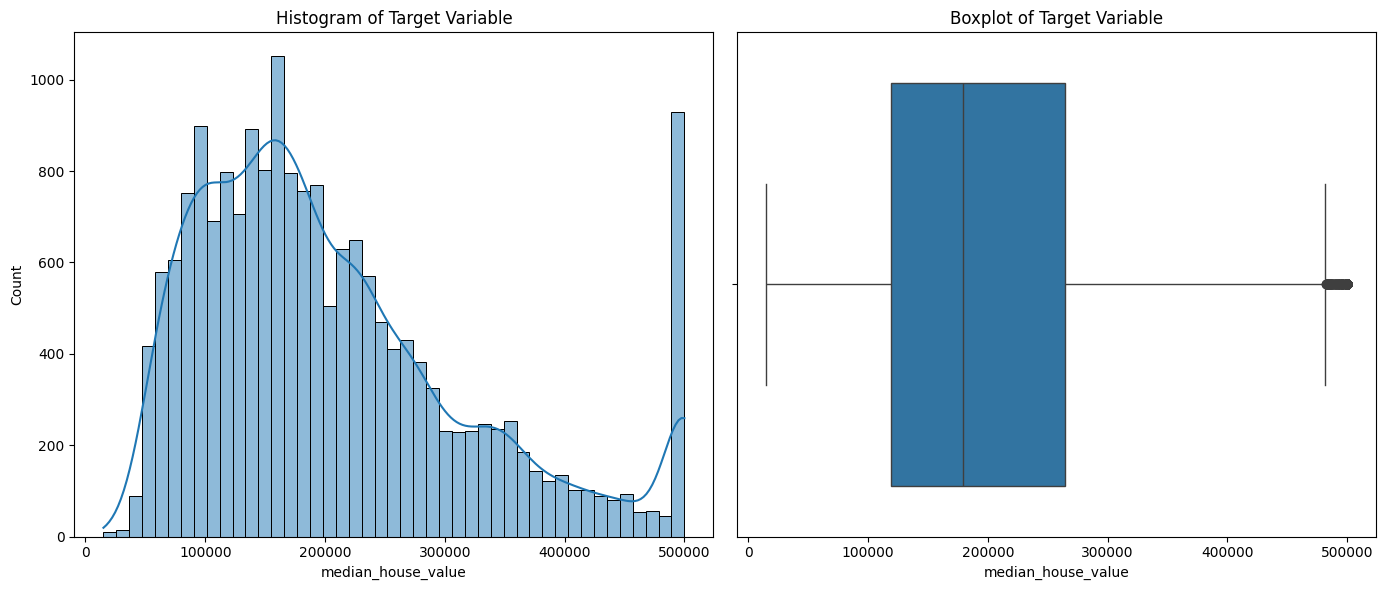

In [ ]:
plt.figure(figsize=(14, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df[target], kde=True)
plt.title('Histogram of Target Variable')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=df[target])
plt.title('Boxplot of Target Variable')

plt.tight_layout()
plt.show()

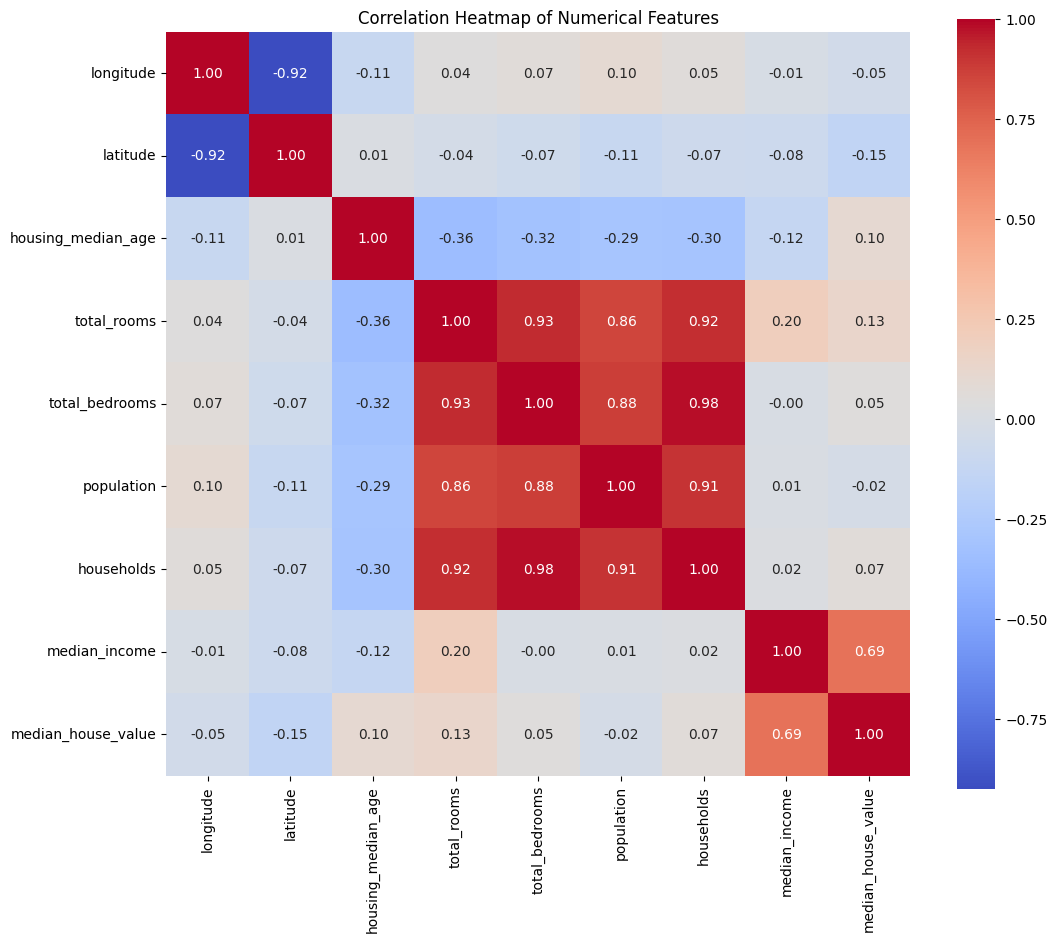

In [ ]:
# Correlation matrix
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

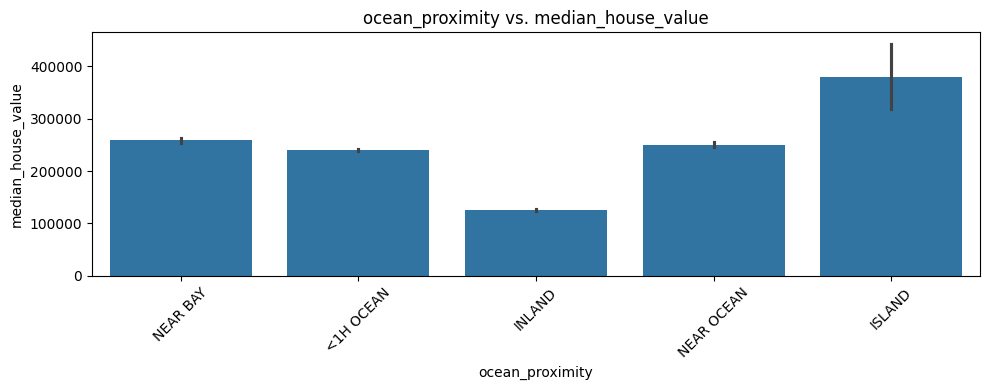

In [ ]:
for col in cat_cols:
    plt.figure(figsize=(10, 4))
    sns.barplot(x=col, y=target, data=df, estimator=np.mean)
    plt.title(f'{col} vs. {target}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

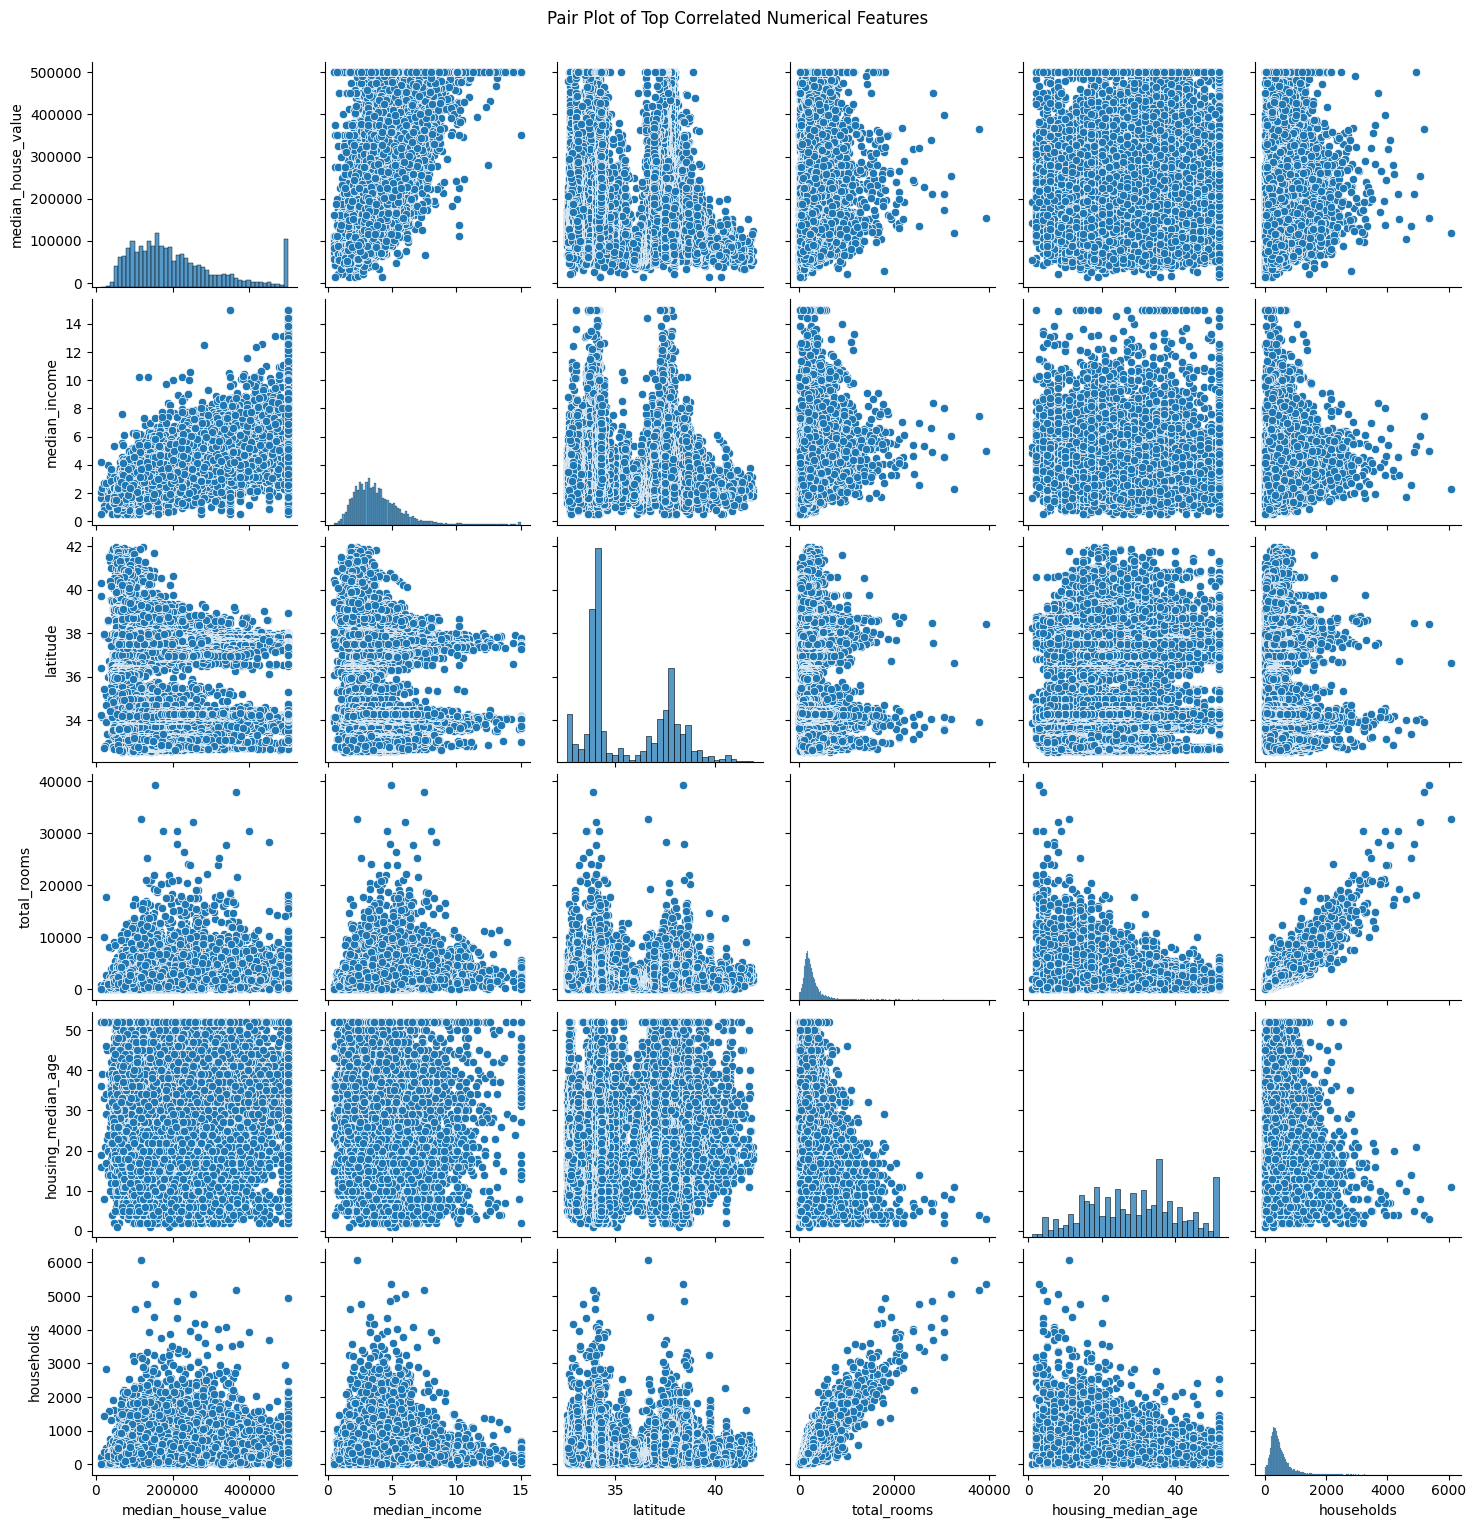

In [ ]:
# Get top 5 correlated features with the target
top_corr = corr_matrix[target].abs().sort_values(ascending=False).head(6).index.tolist()

# Pairplot
sns.pairplot(df[top_corr])
plt.suptitle("Pair Plot of Top Correlated Numerical Features", y=1.02)
plt.show()

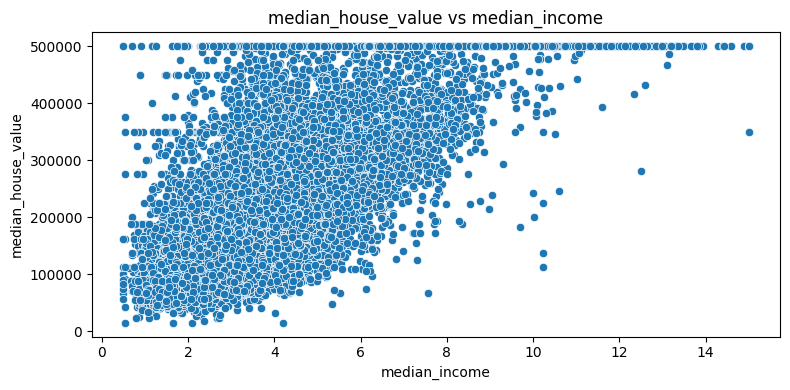

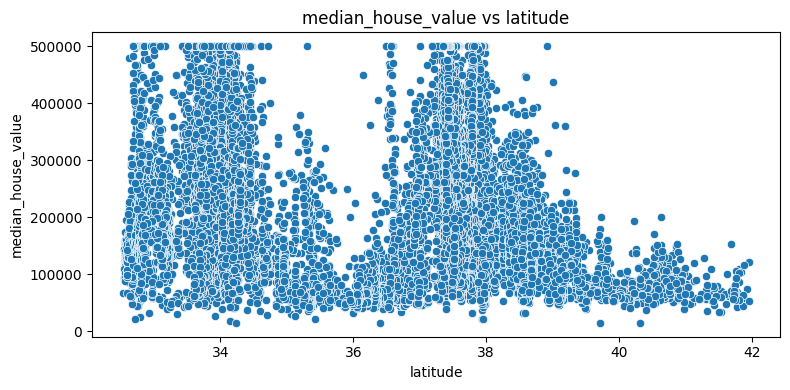

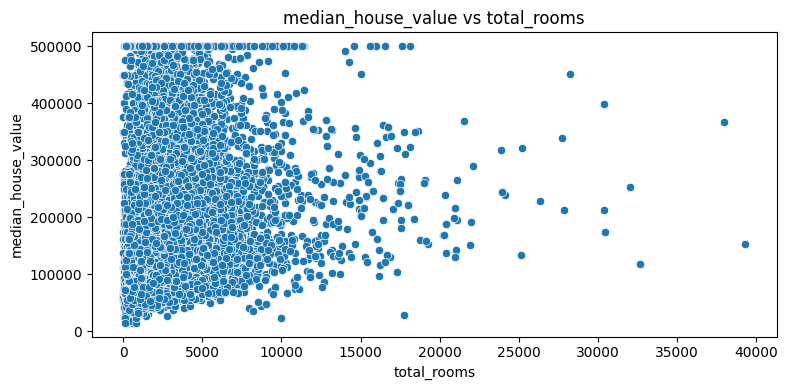

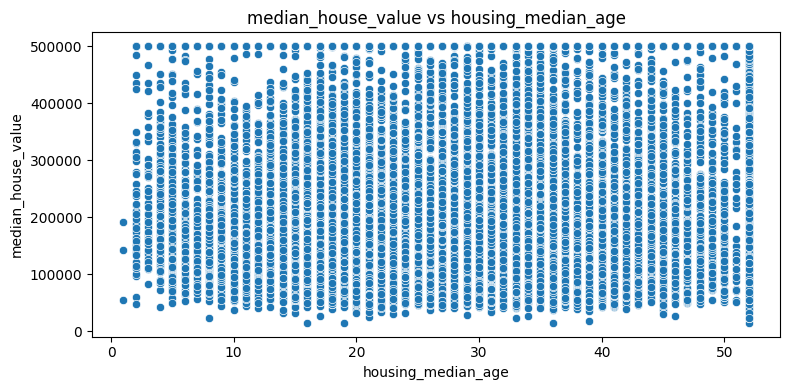

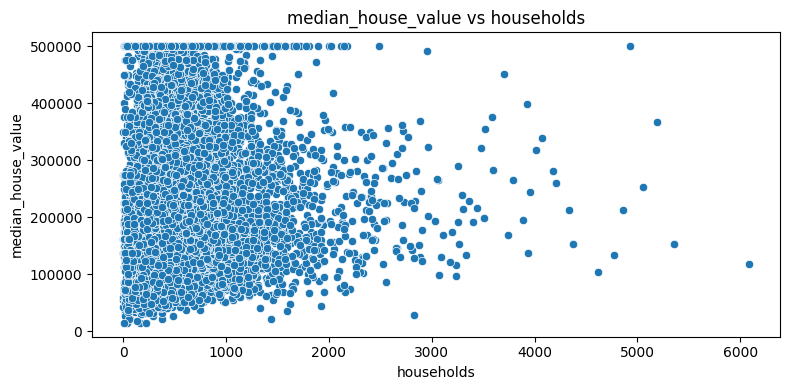

In [ ]:
for col in top_corr:
    if col != target:
        plt.figure(figsize=(8, 4))
        sns.scatterplot(x=df[col], y=df[target])
        plt.title(f'{target} vs {col}')
        plt.tight_layout()
        plt.show()

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,18565.000000,18565.000000,18565.000000,18565.000000,18376.000000,18565.000000,18565.000000,18565.000000,18565.000000
mean,-119.570116,35.633888,28.615890,2634.033827,537.711199,1426.223108,499.450902,3.867012,206617.794991
std,2.002922,2.137014,12.564224,2195.915548,424.125849,1142.570832,384.553175,1.895988,115447.104881
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1442.000000,295.000000,786.000000,279.000000,2.561200,119300.000000
50%,-118.500000,34.260000,29.000000,2123.000000,434.000000,1166.000000,408.000000,3.534100,179400.000000
75%,-118.010000,37.710000,37.000000,3141.000000,646.000000,1725.000000,603.000000,4.741100,264400.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,8188
INLAND,5921
NEAR OCEAN,2399
NEAR BAY,2052
ISLAND,5


In [ ]:
# check the missing values
df.isnull().sum().sort_values(ascending=False)

,0
total_bedrooms,189
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
# Fill missing values with Median
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
3,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY
4,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,NEAR BAY


In [ ]:
df['total_bedrooms'] = df['total_bedrooms'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18565 entries, 0 to 18564
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18565 non-null  float64
 1   latitude            18565 non-null  float64
 2   housing_median_age  18565 non-null  int64  
 3   total_rooms         18565 non-null  int64  
 4   total_bedrooms      18565 non-null  int64  
 5   population          18565 non-null  int64  
 6   households          18565 non-null  int64  
 7   median_income       18565 non-null  float64
 8   median_house_value  18565 non-null  int64  
 9   ocean_proximity     18565 non-null  object 
dtypes: float64(3), int64(6), object(1)
memory usage: 1.4+ MB


In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500,NEAR BAY
2,-122.25,37.85,52,1627,280,565,259,3.8462,342200,NEAR BAY
3,-122.25,37.85,52,919,213,413,193,4.0368,269700,NEAR BAY
4,-122.25,37.84,52,2535,489,1094,514,3.6591,299200,NEAR BAY


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

In [ ]:
# Assuming your data is loaded in df
# Separate features and target
X = df.drop('median_house_value', axis=1)  # Replace 'price' with your target column name
y = df['median_house_value']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ValueError: could not convert string to float: '<1H OCEAN'